# Probabilities and Information Theory

## Introduction

**Probability Theory** is the study of probability and its interpretations through a set of rigorous mathematical formalism and axioms. It defines probability in terms of a probability space and probability measures between $0$ and $1$. In conjunction with Linear Algebra, Probability is one of the bases for Machine Learning.

## Fundamentals of Probability

In this section, the fundamental concepts of probability theory, **Random Experiments**, **Sets**, **Indepedence**, **Conditional Probability**, and **Baye's Rule** are discussed.

### Random Experiments

The **Probability** of an **Event** , defined as the chance of its realization,  is encoded as a **Positive Real Numeral** between $0$ and $1$. Formally speaking, we first define a **Probability Space** composed of the three following components: a **Sample Space** $\Omega$ representing all possible outcomes of an experiment, a set of possible **Events**, as well as a **Probability Function** $P$ measuring the chance of each event to occur.

```{note}
Note the $\Omega$ contains itself but also the empty set of events $\varnothing$.
```

The probability function is defined such as it always respect the following requirements:
- $P(\varnothing)=0$
- $P(\Omega)=1$
- $P(A \cup B)=P(A) + P(B)$ for two disjoint events $A$ and $B$
- $P(\overline{A}) = 1 - P(A)$ with $\overline{A}$ being the complement of the event $A$.

Let us illustrate those concepts by comparing three random experiments by **Monte Carlo Simulation** in conjunction with the **Theroy**.

#### Rowling Dices

Consider the following experiment where two independant and non-pipped six-sided dices are rolled, and we want to find the probability of the both dice being odd. The problem can be formalised as follow:
- $\Omega = \left \{ 1, \dots, 6  \right \}^2$
- $A = \left \{ (i, j) \; | \; i + j \; \text{is odd} \right \}$
- $P(B) = \frac{|B|}{|\Omega|}$ where $|.|$ denotes the number of element in the given set

The probability function is symmetric and can be resumed in the following table:

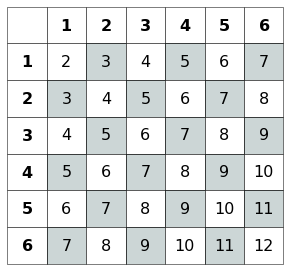

In [1]:
import matplotlib.pyplot as plt
plt.ion()
plt.style.use("fivethirtyeight")

omega = list(range(0, 6 + 1))
table = [[i + j for j in omega] for i in omega]
color = [[(1, 1, 1, 1) if e % 2 == 0 else (0, 0.2, 0.2, 0.2) for e in row] for row in table]
table = [[str(e) for e in row] for row in table]

bold = lambda x: f"$\\bf{x}$"

for i in range(0, 6 + 1):
    color[i][0] = color[0][i] = (1, 1, 1, 1)
    table[i][0] = table[0][i] = bold(i) if i > 0 else ""

cell_size = 0.3
size = cell_size * len(table)

fig = plt.figure(figsize=(size, size),  facecolor="white")
ax = fig.add_subplot(1, 1, 1)
ax.set_axis_off()

table = ax.table(cellText=table, cellColours=color, loc="center", cellLoc="center")
table.set_fontsize(16)
for pos, cell in table.get_celld().items():
    cell.set_height(cell_size)
    cell.set_width(cell_size)

fig.canvas.draw()

In [2]:
from myst_nb import glue
glue("experiment_dice_fig", fig, display=False)

```{glue:figure} experiment_dice_fig
:align: center
:name: "experiment-dice-fig"

Table representig the probabilities for each value of the two dices. The odd outcomes'cell are filled in gray.
```

Using the defined probability function, we can now compute the probability of the event $A$ as beign:

$$
P(A) = \frac{18}{36} = 0.5
$$

In [3]:
from itertools import product

import numpy as np
np.random.seed(42)


N, FACES = int(10e4), list(range(1, 6 + 1))
is_odd = lambda x: x % 2 != 0

th_p = np.sum([is_odd(i + j) for i, j in product(FACES, FACES)]) / (len(FACES) ** 2)
mc_p = np.sum([is_odd(np.random.choice(FACES) + np.random.choice(FACES)) for _ in range(N)]) / N

print(f"Theory                : P(A) = {th_p * 100:.2f}%")
print(f"Monte Carlo Estimation: P(A) = {mc_p * 100:.2f}%")

Theory                : P(A) = 50.00%
Monte Carlo Estimation: P(A) = 50.06%


#### Birthday Paradox

Consider a room full of people. If we ask the following question: What is the probability of having pairs of people with the same birthday date without the year? It is certain that with 366 people, you will have at least one pair. But what if we have fewer people? With 50 people, there is 50% chance for the existence of such a pair. This problem is referred to as the birthday paradox.

Let us formalized this problem as follow:
- $\Omega=\left \{ (x_i, x_j) \; \text{with} \; x_i, x_j \in \left \{ 1, \dots, 365 \right \} \right \}$, $|\Omega| = 365^n$
- $A = \left \{ (x_i, x_j) \; \text{whre} \; x_i=x_j \right \}$

Let us considere $\overline{A}$ which consists of all the tuples where $x_i \neq x_j$.

$$
|\overline{A}| = 365 \cdot 364 \cdot \dots \cdot (365 - n + 1) = \frac{365!}{(365 - n)!}
$$

As $\overline{A}$ is the complement for $A$:

$$
P(A) = 1 - P(\overline{A}) = 1 - \frac{|\overline{A}|}{|\Omega|} = 1 - \frac{365!}{(365 - n)! \cdot 365^n}
$$

In this sense, if we take a room of 50 people $P(A) \approx 97.04\%$.

In [4]:
import numpy as np
np.random.seed(42)


N = int(1e2)

factorial = lambda n: 1 if n == 0 else n * factorial(n - 1)
factorials = [factorial(i) for i in range(366)]

days = lambda n: np.random.randint(1, 365 + 1, size=n)
same = lambda a: np.max(np.unique(a, return_counts=True)[1]) > 1

theo = lambda n: 1 - (factorials[365] / (factorials[365 - n] * (365 ** n))) 
simu = lambda n: np.sum([same(days(n)) for _ in range(N)]) / N 

ns = list(range(60 + 1))
th_ps = np.array([0 if n == 0 else theo(n) for n in ns])
mc_ps = np.array([0 if n == 0 else simu(n) for n in ns])

total_error = np.abs(th_ps - mc_ps).mean()
print(f"Theory vs Monte Carlo Simulation Mean Absolute Error: {total_error:.2f}")

Theory vs Monte Carlo Simulation Mean Absolute Error: 0.03


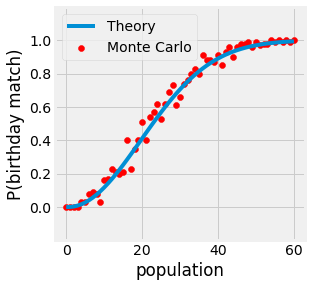

In [5]:
import matplotlib.pyplot as plt
plt.ion()
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(4, 4),  facecolor="white")
ax = fig.add_subplot(1, 1, 1)

line, *_ = ax.plot(th_ps)
scat = ax.scatter(range(len(mc_ps)), mc_ps, color="r")
ax.set_ylim(-0.2, 1.2)
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_xlabel("population")
ax.set_ylabel("P(birthday match)")
ax.legend(handles=[line, scat], labels=["Theory", "Monte Carlo"])

fig.canvas.draw()

In [6]:
from myst_nb import glue
glue("experiment_birthday_fig", fig, display=False)

```{glue:figure} experiment_birthday_fig
:align: center
:name: "experiment-birthday-fig"

Probability of a matching birthday in a room of n people.
```

### Sets

**Sets** are playing a big part in the field of probability. In this regard, it is natural to discuss the **Intersection**, the **Union**, and **Difference** of sets.

If we consider $A$ and $B$ two subsets of some $\Omega$, we denote:
- $A \cap B$ the intersection of $A$ and $B$
- $A \cup B$ the union of $A$ and $B$
- $A \setminus B$ the difference of $A$ and $B$
- $\overline{A} = \Omega \setminus A$ the complement for $A$

The probability of the union is defined as follow:

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

The intersection of two disjoint event is:

$$
P(A \cap B) = P(A) P(B)
$$

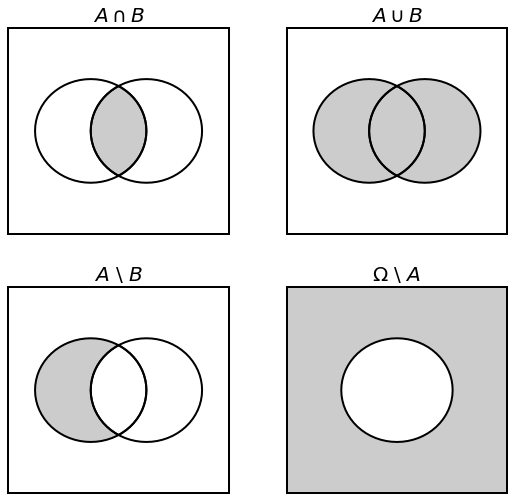

In [7]:
import descartes
import matplotlib.pyplot as plt
import shapely.geometry as sg
plt.ion()
plt.style.use("fivethirtyeight")

a = sg.Point(-0.5, 0.0).buffer(1.)
b = sg.Point( 0.5, 0.0).buffer(1.)
c = sg.Point( 0.0, 0.0).buffer(1.)

left   = a.difference(b)
right  = b.difference(a)
middle = a.intersection(b)

fig = plt.figure(figsize=(8, 8),  facecolor="white")
ax1, ax2, ax3, ax4 = [fig.add_subplot(2, 2, i + 1) for i in range(4)]

ax1.add_artist(descartes.PolygonPatch(left,   fc=(0, 0, 0, 0.0), ec="k", lw=2))
ax1.add_artist(descartes.PolygonPatch(right,  fc=(0, 0, 0, 0.0), ec="k", lw=2))
ax1.add_artist(descartes.PolygonPatch(middle, fc=(0, 0, 0, 0.2), ec="k", lw=2))
ax1.add_artist(
    plt.Rectangle((-2, -2), width=4, height=4, facecolor=(0, 0, 0, 0), edgecolor="k", lw=4)
)
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_axis_off()
ax1.title.set_text("$A \cap B$")

ax2.add_artist(descartes.PolygonPatch(left,   fc=(0, 0, 0, 0.2), ec="k", lw=2))
ax2.add_artist(descartes.PolygonPatch(right,  fc=(0, 0, 0, 0.2), ec="k", lw=2))
ax2.add_artist(descartes.PolygonPatch(middle, fc=(0, 0, 0, 0.2), ec="k", lw=2))
ax2.add_artist(
    plt.Rectangle((-2, -2), width=4, height=4, facecolor=(0, 0, 0, 0), edgecolor="k", lw=4)
)
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_axis_off()
ax2.title.set_text("$A \cup B$")

ax3.add_artist(descartes.PolygonPatch(left,   fc=(0, 0, 0, 0.2), ec="k", lw=2))
ax3.add_artist(descartes.PolygonPatch(right,  fc=(0, 0, 0, 0.0), ec="k", lw=2))
ax3.add_artist(descartes.PolygonPatch(middle, fc=(0, 0, 0, 0.0), ec="k", lw=2))
ax3.add_artist(
    plt.Rectangle((-2, -2), width=4, height=4, facecolor=(0, 0, 0, 0), edgecolor="k", lw=4)
)
ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_axis_off()
ax3.title.set_text("$A$ \\ $B$")

ax4.add_artist(
    plt.Rectangle((-2, -2), width=4, height=4, facecolor=(0, 0, 0, 0.2), edgecolor="k", lw=4)
)
ax4.add_artist(descartes.PolygonPatch(c, fc=(1, 1, 1, 1.0), ec="k", lw=2))
ax4.set_xlim(-2, 2)
ax4.set_ylim(-2, 2)
ax4.set_axis_off()
ax4.title.set_text("$\Omega$ \\ $A$")

fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.canvas.draw()

In [8]:
from myst_nb import glue
glue("sets_fig", fig, display=False)

```{glue:figure} sets_fig
:align: center
:name: "sets-fig"

Intersection, Union, Difference, and Complement of $A$ and $B$ from $\Omega$.
```

#### Rushed Enveloppes

Consider a secretary dealing with letters and envelopes. In each of the $n$ envelope correspond to one letter. Now let us imagine the secretary in a rush and place each letter in a random envelope. The probability of each letter going into the correct envelope is $\frac{1}{n!}$. But what about the probability of all letters going into the wrong one?

Let us denote $A_i$ the event of having the $i$-th letter in the correct envelope.

$$
\begin{align}
B = \bigcap_{i=1}^{n} \overline{A_i}  && \overline{B} = \bigcup_{i=1}^{n} {A_i}
\end{align}
$$

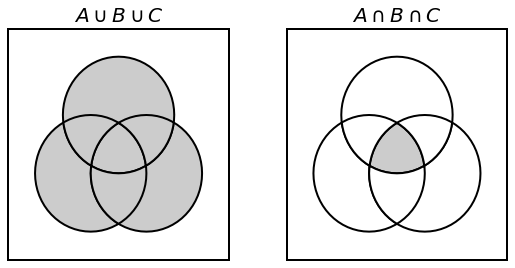

In [9]:
import descartes
import matplotlib.pyplot as plt
import shapely.geometry as sg
plt.ion()
plt.style.use("fivethirtyeight")

a = sg.Point(-0.5, -0.5).buffer(1.)
b = sg.Point( 0.5, -0.5).buffer(1.)
c = sg.Point( 0.0,  0.5).buffer(1.)

mc = a.intersection(b).intersection(c)
ml = c.intersection(a).difference(b)
mr = c.intersection(b).difference(a)
mb = a.intersection(b).difference(c)

fig = plt.figure(figsize=(8, 4),  facecolor="white")
ax1, ax2 = [fig.add_subplot(1, 2, i + 1) for i in range(2)]

ax1.add_artist(descartes.PolygonPatch(a,  fc=(0.8, 0.8, 0.8, 1.0), ec="k", lw=2))
ax1.add_artist(descartes.PolygonPatch(b,  fc=(0.8, 0.8, 0.8, 1.0), ec="k", lw=2))
ax1.add_artist(descartes.PolygonPatch(c,  fc=(0.8, 0.8, 0.8, 1.0), ec="k", lw=2))
ax1.add_artist(descartes.PolygonPatch(mc, fc=(0.8, 0.8, 0.8, 1.0), ec="k", lw=2))
ax1.add_artist(descartes.PolygonPatch(ml, fc=(0.8, 0.8, 0.8, 1.0), ec="k", lw=2))
ax1.add_artist(descartes.PolygonPatch(mr, fc=(0.8, 0.8, 0.8, 1.0), ec="k", lw=2))
ax1.add_artist(descartes.PolygonPatch(mb, fc=(0.8, 0.8, 0.8, 1.0), ec="k", lw=2))
ax1.add_artist(
    plt.Rectangle((-2, -2), width=4, height=4, facecolor=(0, 0, 0, 0), edgecolor="k", lw=4)
)
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_axis_off()
ax1.title.set_text("$A \cup B \cup C$")

ax2.add_artist(descartes.PolygonPatch(a,  fc=(1.0, 1.0, 1.0, 1.0), ec="k", lw=2))
ax2.add_artist(descartes.PolygonPatch(b,  fc=(1.0, 1.0, 1.0, 1.0), ec="k", lw=2))
ax2.add_artist(descartes.PolygonPatch(c,  fc=(1.0, 1.0, 1.0, 1.0), ec="k", lw=2))
ax2.add_artist(descartes.PolygonPatch(mc, fc=(0.8, 0.8, 0.8, 1.0), ec="k", lw=2))
ax2.add_artist(descartes.PolygonPatch(ml, fc=(1.0, 1.0, 1.0, 1.0), ec="k", lw=2))
ax2.add_artist(descartes.PolygonPatch(mr, fc=(1.0, 1.0, 1.0, 1.0), ec="k", lw=2))
ax2.add_artist(descartes.PolygonPatch(mb, fc=(1.0, 1.0, 1.0, 1.0), ec="k", lw=2))
ax2.add_artist(
    plt.Rectangle((-2, -2), width=4, height=4, facecolor=(0, 0, 0, 0), edgecolor="k", lw=4)
)
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_axis_off()
ax2.title.set_text("$A \cap B \cap C$")

fig.subplots_adjust(hspace=0.25, wspace=0.25)
fig.canvas.draw()

In [10]:
from myst_nb import glue
glue("sets_venndiag_fig", fig, display=False)

```{glue:figure} sets_venndiag_fig
:align: center
:name: "sets-venndiag-fig"

Venn Diargrams for $A \cup B \cup C$ and $A \cap B \cap C$.
```

The probability of having no letter in the correct enveloppe is then given by:

$$
P(B) = 1 - P\left (\ \bigcup_{i=1}^{n} A_i \right )\ = 1 - \sum_{i=1}^{n} (-1)^{i + 1} \begin{pmatrix} n \\ i \end{pmatrix} \frac{(n - i)!}{n!} = \sum_{i=0}^{n} \frac{(-1)^i}{i!}
$$

```{note}
Notice that $lim \underset{n \rightarrow +\infty}{P(B)} = \frac{1}{e} \approx 0.2855$.
```

In [11]:
import numpy as np
np.random.seed(42)


N = int(10e2)

factorial = lambda n: 1 if n == 0 else n * factorial(n - 1)
factorials = [factorial(i) for i in range(60)]

rand = lambda n: np.array(sorted(range(n), key=lambda k: np.random.rand()))
expe = lambda n: (np.arange(n) == rand(n)).sum() == 0
simu = lambda n: np.sum([expe(n) for _ in range(N)]) / N
theo = lambda n: np.sum([((-1) ** i) / factorials[i] for i in range(n)])

ns = list(range(60 + 1))
th_ps = np.array([0 if n == 0 else theo(n) for n in ns])
mc_ps = np.array([0 if n == 0 else simu(n) for n in ns])

total_error = np.abs(th_ps - mc_ps).mean()
print(f"Theory vs Monte Carlo Simulation Mean Absolute Error: {total_error:.2f}")

Theory vs Monte Carlo Simulation Mean Absolute Error: 0.04


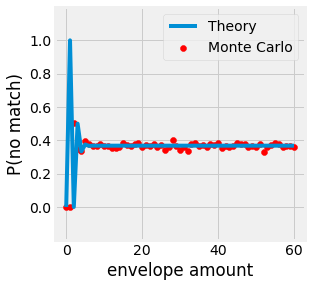

In [12]:
import matplotlib.pyplot as plt
plt.ion()
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(4, 4),  facecolor="white")
ax = fig.add_subplot(1, 1, 1)

line, *_ = ax.plot(th_ps)
scat = ax.scatter(range(len(mc_ps)), mc_ps, color="r")
ax.set_ylim(-0.2, 1.2)
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_xlabel("envelope amount")
ax.set_ylabel("P(no match)")
ax.legend(handles=[line, scat], labels=["Theory", "Monte Carlo"])

fig.canvas.draw()

In [13]:
from myst_nb import glue
glue("sets_envelopes_fig", fig, display=False)

```{glue:figure} sets_envelopes_fig
:align: center
:name: "experiment-envelope-fig"

Probability of no matching letter with a set of n envelopes.
```

### Independence

Two events are considered **Independent** from each other when their intersection is the product of their probability.

$$
P(A \cap B) = P(A)P(B)
$$

```{note}
Be careful, **Disjoint** does not mean **Independence**.
```

**Independence** often occurs when the components of an experiment involve **no interaction** between them. It is the case for two flipping coins, for example. A direct implication of two events being independent is:

$$
P(A \cup B) = P(A) + P(B) - P(A) P(B)
$$

### Conditional Probability

When dealing with experiments, it often happens to find that one event is dependant on another. This phenomenon is formalized by the name of **Conditional Probability**. $A$ given $B$ is written $P(A | B)$ and is defined by:

$$
P(A | B) = \frac{P(A \cap B)}{P(B)}
$$

Often rewrote as:

$$
P(A \cap B) = P(A | B) P(B)
$$

```{note}
If $A$ and $B$ are two **Independent* events, $P(A | B) = P(A)$. 
```

#### Law of Total Probability

One consequence of introducing the notion of conditional probability is the possibility to express the probability of a given event through conditional disjoint unions. This phenomenon is referred to as the **Law of Total Probability**:

$$
P(A) = \sum_{i=0}^{\infty} P(A \cap B_i) = \sum_{i=0}^{\infty} P(A | B_i) P(B_i)
$$

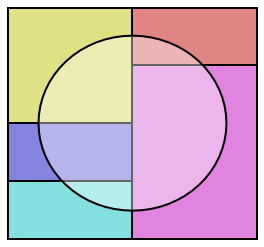

In [14]:
import descartes
import matplotlib.pyplot as plt
import shapely.geometry as sg
plt.ion()
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(4, 4),  facecolor="white")
ax = fig.add_subplot(1, 1, 1)

c = sg.Point(0, 0).buffer(1.5)

ax.add_artist(plt.Rectangle((-2, -2), width=2, height=1, facecolor=(0.2, 0.8, 0.8, 0.6), edgecolor="k", lw=2))
ax.add_artist(plt.Rectangle((-0, -2), width=2, height=3, facecolor=(0.8, 0.2, 0.8, 0.6), edgecolor="k", lw=2))
ax.add_artist(plt.Rectangle((-2,  0), width=2, height=3, facecolor=(0.8, 0.8, 0.2, 0.6), edgecolor="k", lw=2))
ax.add_artist(plt.Rectangle((-2, -1), width=2, height=1, facecolor=(0.2, 0.2, 0.8, 0.6), edgecolor="k", lw=2))
ax.add_artist(plt.Rectangle(( 0,  1), width=2, height=1, facecolor=(0.8, 0.2, 0.2, 0.6), edgecolor="k", lw=2))
ax.add_artist(plt.Rectangle((-2, -2), width=4, height=4, facecolor=(0.0, 0.0, 0.0, 0.0), edgecolor="k", lw=4))
ax.add_artist(descartes.PolygonPatch(c, fc=(1.0, 1.0, 1.0, 0.4), ec="k", lw=2))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_axis_off()

fig.canvas.draw()

In [15]:
from myst_nb import glue
glue("total_prob_fig", fig, display=False)

```{glue:figure} total_prob_fig
:align: center
:name: "total-prob-fig"

Visualization of disjoint partitions $B_i$ of $\Omega$ in color and event $A$ represented by a circle.
```

### Baye's Theorem

The **Baye's Theorem** also called **Baye's Rule** is a reformulation of the conditional probability definition:

$$
P(H | e) = \frac{P(e | H) P(H)}{P(e)}
$$

The rewriting of the formula is quite easy but powerful. It says that we can express a **posterior** probability $P(H | e)$, the probability of hypothesis $H$ given the:
- observed **evidence** $e$, using our **prior** knowledge on the hypothesis before observation $P(H)$
- **likelihood** of the evidence given our hypothesis is true
- **marginal** probability $P(e)$, how probable is the new evidence under all possible hypotheses

#### Radio Transmission

Consider the example of a radio signal sent from the ISS to earth. Let say the bits transmitted are $1$ 75% else $0$. It is logical to consider the fact that the transmitted signal can be altered, distorted through physical phenomena. Let us denote $\epsilon_0$ the chance of receiving a $1$ instead of a $0$, and $\epsilon_1$ the chance or receiving a $0$ instead of a $1$.

Suppose you received a bit $R$ as a 1. What is the probability that it was, in fact, transmitted $T$ as 1? We can obtain the response by applying Baye's Rule:

$$
P(T=1 | R=1) = \frac{P(R=1\;|\;T=1) P(T=1)}{P(R=1)} = \frac{0.7(1 - \epsilon_1)}{0.7 (1 - \epsilon_1) + 0.3 \epsilon_0}
$$

In [16]:
import numpy as np


N = int(10e4)

prior = 0.75
eps_0, eps_1 = 0.2, 0.1

flip = lambda bit: bit ^ 1 if np.random.rand() < (eps_1 if bit else eps_0) else bit

T_bits = (np.random.rand(N) < prior).astype(int)
R_bits = np.array([flip(bit) for bit in T_bits]) 

ones = R_bits == 1
ones_count = ones.sum()

mc_p = (T_bits[ones] == 1).sum() / ones_count
th_p = prior * (1 - eps_1) / (prior * (1 - eps_1) + (1 - prior) * eps_0)

print(f"Theory              : P(T=1 | R=1) = {th_p}")
print(f"Monte Carlo Estimate: P(T=1 | R=1) = {mc_p}")

Theory              : P(T=1 | R=1) = 0.9310344827586207
Monte Carlo Estimate: P(T=1 | R=1) = 0.9311757589089309


## Random Variables and Distributions

Now that we have a sense of what probability is, it is time to introduce the notion of **Random Variables** and the various probability **Distributions**. 

### Random Variables

In probability, the numerical values involved in a random experiment are called **Random Variable**. The random variable $X$ is a function of the sample space $\Omega$ that represents some outcome $X(\omega)$ for a given outcome $\omega$. The **Probability Distribution** of the random variable $X$ is represented by the function:

$$
p(x)=P(X=x)
$$

Random Variables can take different forms and can be either **discrete** or **continuous** depending on the problem's nature. Let us consider an example for each of those two types.

#### Discrete Random Variable

Consider a bag containing a defined number of balls of different colors. Let now define $X:\Omega \rightarrow \mathbb{Z}$, the discrete random variable counting the number of occurrences of one color for each ball. Each ball has the same chance of being picked. In this case, the probability distribution can be represented using a **Probability Mass Function** *(PMF)* $p$ where:

$$
p(x)=P(X=x), \; x \in \mathbb{Z}
$$

The *PMF* always respect the following:

$$
\sum_x p(x) = 1
$$

#### Continuous Random Variable

In continuous space, random variable are often represented with continuous random variables. In this case, the *PMF* does not hold any more,  $p(x)=0$ for every given $x$. We then talk about **Probability Density Function** *(PDF)* p(x):

$$
p(x)_{h \rightarrow 0} \approx P(x \leq X \leq x + h)
$$

The *PDF* always respect the following:

$$
\int_{-\infty}^{+\infty} p(x) = 1
$$

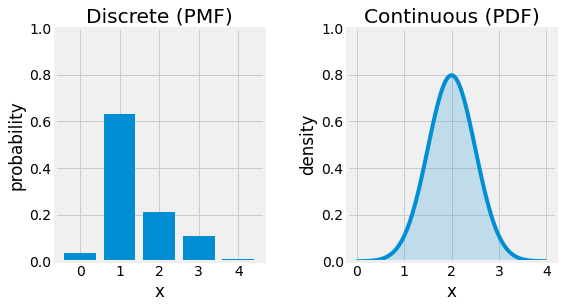

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.ion()
plt.style.use("fivethirtyeight")
np.random.seed(42)

fig = plt.figure(figsize=(8, 4),  facecolor="white")
ax1, ax2 = [fig.add_subplot(1, 2, i + 1) for i in range(2)]

n = 5
probas = np.exp(np.random.uniform(0, 5, size=n))
probas = probas / probas.sum()

ax1.bar(range(n), probas)
ax1.set_ylim(0, 1)
ax1.set_xticks(range(0, 4 + 1))
ax1.title.set_text("Discrete (PMF)")
ax1.set_xlabel("x")
ax1.set_ylabel("probability")

bell = lambda x, m, s: (1 / (s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - m) / s) ** 2) 
X = np.linspace(0, 4, num=100)
Y = bell(X, 2, 0.5)

ax2.plot(X, Y)
ax2.fill_between(X, np.zeros_like(Y), Y, alpha=0.2)
ax2.set_ylim(0, 1)
ax2.set_xticks(range(0, 4 + 1))
ax2.title.set_text("Continuous (PDF)")
ax2.set_xlabel("x")
ax2.set_ylabel("density")

fig.subplots_adjust(hspace=0.25, wspace=0.40)
fig.canvas.draw()

In [18]:
from myst_nb import glue
glue("dist_types_fig", fig, display=False)

```{glue:figure} dist_types_fig
:align: center
:name: "dist-types-fig"

PMF of a random discrete variable left, and PDF of a random continuous variable right.
```

### Sum Rule

Consider a set of random variables. If we want to compute the probability distribution over a subset of them, the **Marginal Probability Distrubution**, it is possible to do so using the **Sum Rule**. Let us consider $X$ and $Y$, two random variables. We only know $P(X, Y)$ and we want to compute $P(X)$:

$$
\begin{align}
P(X=x) = \sum_{y} P(X=x,Y=y) && p(x) = \int p(x, y) dy
\end{align}
$$

```{note}
The low of total probability connects the marginal probabilities with conditional probabilities.
```

The name of **Marginal Probability** comes from its computation using a probability table on paper, as the following example illustrates with the voting for a woman president displayed by voter's gender:

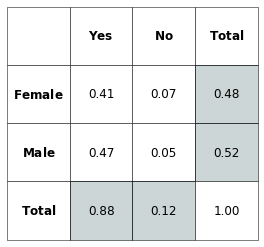

In [19]:
import matplotlib.pyplot as plt
plt.ion()
plt.style.use("fivethirtyeight")

bold = lambda x: f"$\\bf{x}$"
table = [
    [            "",  bold("Yes"), bold("No"), bold("Total")],
    [bold("Female"),       "0.41",     "0.07",        "0.48"],
    [bold("Male"  ),       "0.47",     "0.05",        "0.52"],
    [bold("Total" ),       "0.88",     "0.12",        "1.00"],
]

n = len(table)
color = [[(1, 1, 1) for j in range(n)] for i in range(n)]
for i in [1, 2]:
    color[n - 1][i] = color[i][n - 1] = (0.0, 0.2, 0.2, 0.2)

cell_size = 0.5
size = cell_size * n

fig = plt.figure(figsize=(size, size),  facecolor="white")
ax = fig.add_subplot(1, 1, 1)
ax.set_axis_off()

table = ax.table(cellText=table, cellColours=color, loc="center", cellLoc="center")
table.set_fontsize(16)
for pos, cell in table.get_celld().items():
    cell.set_height(cell_size)
    cell.set_width(cell_size)

fig.canvas.draw()

In [20]:
from myst_nb import glue
glue("marginal_prob_fig", fig, display=False)

```{glue:figure} marginal_prob_fig
:align: center
:name: "marginal-prob-fig"

Vote for Woman President by Gender. The marginal probabilities are represented in the margin of the table corresponding to the "Total" column and row.
```

### Product Rule

Consider a joint probability distribution over multiple random variables. It may be decomposed as a product of conditional distributions over one variable. This decomposition is called the **Product Rule** or **Chain Rule** and is the following:

$$
P(X_1, \dots, X_n) = P(X_1) \prod_{i=2}^{n} P(X_i \; | \; X_1, \dots, X_{i - 1})
$$

Let us consider an example with four random variables:

$$
\begin{align}
P(X_4, X_3, X_2, X_1) & = P(X_4\;|\;X_3, X_2, X_1) P(X_3, X_2, X_1) \\
                      & = P(X_4\;|\;X_3, X_2, X_1) P(X_3\;|\;X_2, X_1) P(X_2, X_1) \\
                      & = P(X_4\;|\;X_3, X_2, X_1) P(X_3\;|\;X_2, X_1) P(X_2\;| X_1) P(X_1) \\
\end{align}
$$

### Expectation, Variance, and Covariance

Probability theory comes with various metrics for representing and studying the variation of distributions such as the **Expectation**, **Variance**, **Standard Deviation**, and the **Covariance** for example.

The **Expectation** of any function $f$ in respect to a random variable $X$, $\mathbb{E}(x)$, is its weighted average over the dostribution $P(X)$:

$$
\begin{align}
\mathbb{E}_{X \sim P}[f(x)] = \sum_x f(x) P(X=x) && E_{X \sim p}[f(x)] = \int f(x) p(x) dx
\end{align}
$$

```{note}
$X \sim P$ is often omitted when explicit.
```

The Expectation has the particularity to be a **linear function**:

$$
\mathbb{E}[a f(x) + b g(x)] = a \mathbb{E}[f(x)] + b \mathbb{E}[g(x)]
$$

The **Variance** gives informations about the variation of a function over a random variable and is given by:

$$
\begin{align}
Var(f(x)) & = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] \\
          & = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2
\end{align}
$$

A low variance implies that each sample of the distribution is close to its expected value. We define the **Standard Deviation** as the square root of the variance.

The **Covariance** allow to express in which way and how much linearly related are two values over a random variable sampled from a given distribution:

$$
Cov(f(x), g(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])(g(x) - \mathbb{E}[g(x)])]
$$

```{note}
When the two random variables are independent, their covariance is null.
```

We can then define the **Covariance Matrix** of a random $n$-dimensional vector $x$ as a square matrix of size $n$ where:

$$
Cov(x)_{i,j} = Cov(x_i, x_j)
$$

As $Cov(f(X), f(X))=Var(f(X))$, the diagonal of the covatiant matrix gives the variance of the variable $x_i$.

### Distribution Zoo

Multiple distributions have been defined and studied over the years, depending on their context. In this section, we list some of them and their descriptors. Some details are omitted for the sake of compactness.

#### Discrete Distributions

* **Uniform** $U(a, b)$

The **Uniform** distirbution gives the same probability for every sample of the probability space it is defined on:

$$
p(x) = \begin{cases}
\frac{1}{b-a} & \text{ if } x \in [a, b] \\ 
0 & \text{otherwise} 
\end{cases} 
$$

Its expected value and variance are:

$$
\begin{align}
\mathbb{E}[x] = \frac{a + b}{2} && Var(x) = \frac{(b - a)^2}{12}
\end{align}
$$

* **Bernoulli** $B(p)$

The **Bernoulli** distribution is defined for a binary random variable to which a value of $1$ is given with probability $p$ and $0$ with probability $(1 - p)$:

$$
p(x) = p^k (1 - p)^{1 - k},\;k\in{0;1}
$$

Its expected value and variance are:

$$
\begin{align}
\mathbb{E}[x] = p && Var(x) = p (1 - p)
\end{align}
$$

* **Binomial** $B(n, p)$

The **Binomial** is defined as a $n$ simultaneous trials of independent Bernoulli experiment with $k$ the number of successful trials:

$$
p(x) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1 - p)^{n - k}
$$

Its expected value and variance are:

$$
\begin{align}
\mathbb{E}[x] = np && Var(x) = np(1 - p)
\end{align}
$$

* **Poisson** $Pois(\lambda)$

The **Poisson** distribution can be used for modeling occurences of events over time or space with $k$ the number of occurrences and $\lambda$ the rate of occurrence:

$$
p(x) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

Its expected value and variance are:

$$
\begin{align}
\mathbb{E}[x] = \lambda && Var(x) = \lambda
\end{align}
$$

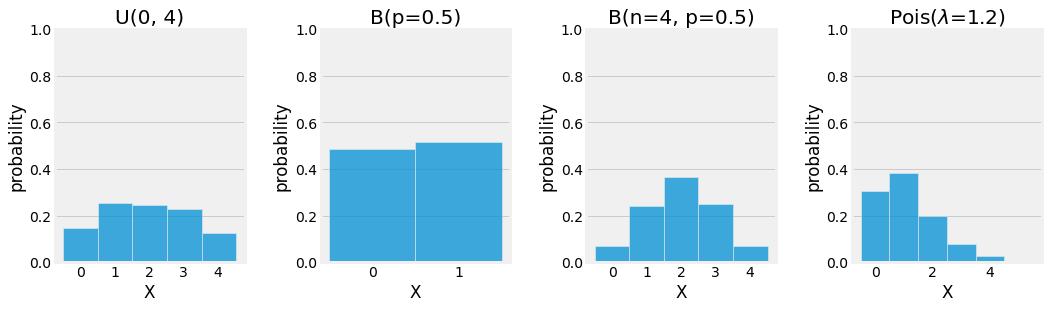

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.ion()
plt.style.use("fivethirtyeight")
np.random.seed(42)

N = int(1e3)

fig = plt.figure(figsize=(20, 4),  facecolor="white")
ax1, ax2, ax3, ax4 = [fig.add_subplot(1, 5, i + 1) for i in range(4)]

sns.histplot(np.random.uniform(0, 4, size=N), ax=ax1, stat="probability", discrete=True)
ax1.title.set_text("U(0, 4)")
ax1.set_xlabel("X")
ax1.set_ylabel("probability")
ax1.set_xticks(range(0, 4 + 1))
ax1.set_ylim(0, 1)
ax1.grid(axis='x')

sns.histplot(np.random.binomial(n=1, p=0.5, size=N), ax=ax2, stat="probability", discrete=True)
ax2.title.set_text("B(p=0.5)")
ax2.set_xlabel("X")
ax2.set_ylabel("probability")
ax2.set_xticks(range(0, 1 + 1))
ax2.set_ylim(0, 1)
ax2.grid(axis='x')

sns.histplot(np.random.binomial(n=4, p=0.5, size=N), ax=ax3, stat="probability", discrete=True)
ax3.title.set_text("B(n=4, p=0.5)")
ax3.set_xlabel("X")
ax3.set_ylabel("probability")
ax3.set_xticks(range(0, 4 + 1))
ax3.set_ylim(0, 1)
ax3.grid(axis='x')

sns.histplot(np.random.poisson(lam=1.2, size=N), ax=ax4, stat="probability", discrete=True)
ax4.title.set_text("Pois($\\lambda$=1.2)")
ax4.set_xlabel("X")
ax4.set_ylabel("probability")
ax4.set_ylim(0, 1)
ax4.grid(axis='x')

fig.subplots_adjust(hspace=0.25, wspace=0.40)
fig.canvas.draw()

In [22]:
from myst_nb import glue
glue("discrete_dist_fig", fig, display=False)

```{glue:figure} discrete_dist_fig
:align: center
:name: "discrete-dist-fig"

Visualization of the discrete Uniform, Bernoulli, Binomial, and Poisson distributions using Monte Carlo Simulation.
```

#### Continuous Distributions

* **Normal (Gaussian)** $\mathcal{N}(\mu, \sigma^2)$

The **Normal**, **Gaussian**, or **Laplce-Gaussian** distribution is continuous and one of the most used distributions to model natural phenomas such as white noise and brownien movement. It is parametrized by a mean $\mu$ and a standard deviation $\sigma$ and looks like a Bell curve:

$$
p(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left (\ \frac{x - \mu}{\sigma} \right )\ ^2}
$$

Its expected value and variance are:

$$
\begin{align}
\mathbb{E}[X] = \mu && Var(X) = \sigma^2
\end{align}
$$

* **Gamma** $\Gamma(k, \theta)$

The **Gamma** distribution is a family of continuous distribution ($\chi^2$ and exponential distribution) used for modeling natural temporal phenomenas sucha as Lifespan Analysis and is parametrized by two parameters, the scale $k$, and the intensity $\theta$:

$$
\begin{align}
p(x) = \frac{x^{k - 1}e^{-\frac{x}{\theta}}}{\Gamma(k)\theta^k} && \Gamma(z) = \int_{0}^{\infty} x^{z - 1}e^{-x}dx
\end{align}
$$

Its expected value and variance are:

$$
\begin{align}
\mathbb{E}[X] = k\theta && Var(X) = k\theta^2
\end{align}
$$

* **Beta** $Beta(\alpha, \beta)$

The **Beta** distribution, generalize to multiple variables with the name **Dirichlet** distribution, is a continuous distribution used to model random behaviours of percentages and distributions, and especially in Bayesian Inference for modeling the conjugate prior probability of the Brenoulli, Binomial and other distributions. It is paremtrized by two positive values, $\alpha$ and $\beta$:

$$
p(x) = x^{\alpha - 1}(1 - x)^{\beta - 1} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}
$$

Its expected value and variance are:

$$
\begin{align}
\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta} && Var(X) = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}
\end{align}
$$

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

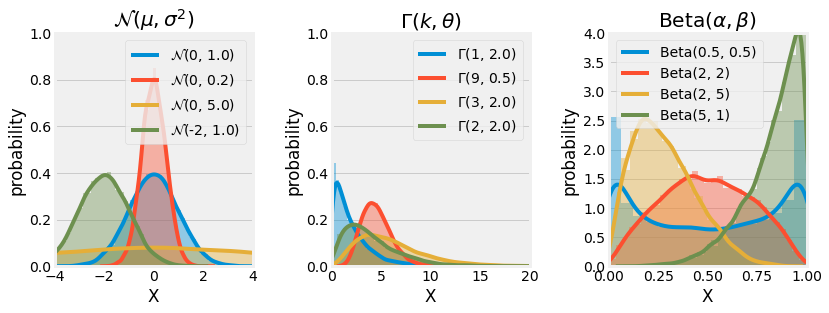

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.ion()
plt.style.use("fivethirtyeight")
np.random.seed(42)

N = int(1e4)

fig = plt.figure(figsize=(12, 4),  facecolor="white")
ax1, ax2, ax3 = [fig.add_subplot(1, 3, i + 1) for i in range(3)]

sns.distplot(np.random.normal( 0, 1.0, size=N), ax=ax1, kde=True, norm_hist=True)
sns.distplot(np.random.normal( 0, 0.5, size=N), ax=ax1, kde=True, norm_hist=True)
sns.distplot(np.random.normal( 0, 5.0, size=N), ax=ax1, kde=True, norm_hist=True)
sns.distplot(np.random.normal(-2, 1.0, size=N), ax=ax1, kde=True, norm_hist=True)
ax1.title.set_text("$\\mathcal{N}(\\mu, \\sigma^2)$")
ax1.set_xlabel("X")
ax1.set_ylabel("probability")
ax1.set_xlim(-4, 4)
ax1.set_ylim(0, 1)
ax1.grid(axis='x')
ax1.legend(labels=[
    "$\\mathcal{N}$(0, 1.0)",
    "$\\mathcal{N}$(0, 0.2)",
    "$\\mathcal{N}$(0, 5.0)",
    "$\\mathcal{N}$(-2, 1.0)",
])

sns.distplot(np.random.gamma(1, 2.0, size=N), ax=ax2, kde=True, norm_hist=True)
sns.distplot(np.random.gamma(9, 0.5, size=N), ax=ax2, kde=True, norm_hist=True)
sns.distplot(np.random.gamma(3, 2.0, size=N), ax=ax2, kde=True, norm_hist=True)
sns.distplot(np.random.gamma(2, 2.0, size=N), ax=ax2, kde=True, norm_hist=True)
ax2.title.set_text("$\Gamma(k, \\theta)$")
ax2.set_xlabel("X")
ax2.set_ylabel("probability")
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 1)
ax2.grid(axis='x')
ax2.legend(labels=[
    "$\Gamma$(1, 2.0)",
    "$\Gamma$(9, 0.5)",
    "$\Gamma$(3, 2.0)",
    "$\Gamma$(2, 2.0)",
])

sns.distplot(np.random.beta(0.5, 0.5, size=N), ax=ax3, kde=True, norm_hist=True)
sns.distplot(np.random.beta(2.0, 2.0, size=N), ax=ax3, kde=True, norm_hist=True)
sns.distplot(np.random.beta(2.0, 5.0, size=N), ax=ax3, kde=True, norm_hist=True)
sns.distplot(np.random.beta(5.0, 1.0, size=N), ax=ax3, kde=True, norm_hist=True)
ax3.title.set_text("Beta$(\\alpha, \\beta)$")
ax3.set_xlabel("X")
ax3.set_ylabel("probability")
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 4)
ax3.grid(axis='x')
ax3.legend(labels=[
    "Beta(0.5, 0.5)",
    "Beta(2, 2)",
    "Beta(2, 5)",
    "Beta(5, 1)",
])

fig.subplots_adjust(hspace=0.25, wspace=0.40)
fig.canvas.draw()

In [24]:
from myst_nb import glue
glue("continuous_dist_fig", fig, display=False)

```{glue:figure} continuous_dist_fig
:align: center
:name: "continuous-dist-fig"

Visualization of the continuous Normal, Gamma, and Beta distributions using Monte Carlo Simulation.
```

#### Mixture of Distributions

It is also common to define some probability distributions as a **Mixture** of different known distributions. It is interesting in the sense that some properties are conserved.

$$
p(x) = \sum_{i=1}^n w_i p_i(x)
$$

```{note}
$$
\mathbb{E}[f(X)] = \sum_{i=1}^{n} w_i \mathbb{E}[f(X_i)]
$$
```

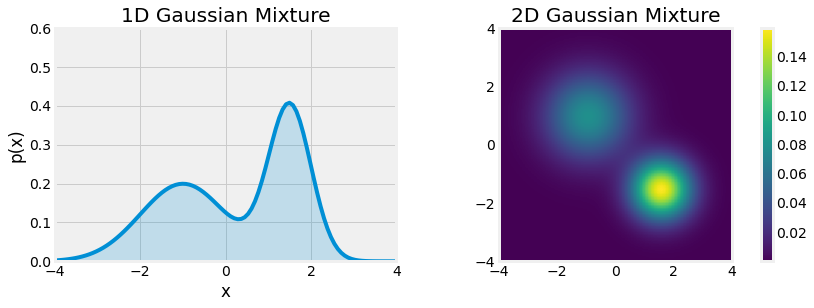

In [155]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import numpy as np
plt.ion()
plt.style.use("fivethirtyeight")
np.random.seed(42)

N = int(1e4)

fig = plt.figure(figsize=(12, 4),  facecolor="white")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

params1 = -1.0, 1.0
params2 =  1.5, 0.5
t = 0.5

mix = lambda a, b, t: t * a + (1 - t) * b
gauss = lambda x, mu, sig: 1 / (sig * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sig) ** 2)
gauss_mixture = lambda x, params1, params2, t: mix(gauss(x, *params1), gauss(x, *params2), t)

X = np.linspace(-4, 4, 100)
Y = gauss_mixture(X, params1, params2, t)
ax1.plot(X, Y)
ax1.fill_between(X, Y, alpha=0.2)
ax1.set_xlim(-4, 4)
ax1.set_ylim(0, 0.6)
ax1.set_xlabel("x")
ax1.set_ylabel("p(x)")
ax1.title.set_text("1D Gaussian Mixture")
ax1.set_xticks(list(range(-4, 4 + 1))[::2])

X, Y = np.mgrid[-4:4:0.1, -4:4:0.1]
XY = np.column_stack([X.flat, Y.flat])
Z = mix(
    multivariate_normal.pdf(XY, mean=[params1[0]] * 2, cov=np.diag([params1[1]] * 2)),
    multivariate_normal.pdf(XY, mean=[params2[0]] * 2, cov=np.diag([params2[1]] * 2)),
    t,
).reshape(X.shape)
img = ax2.imshow(Z, extent=[-4, 4, -4, 4])
ax2.title.set_text("2D Gaussian Mixture")
ax2.set_yticks(np.arange(-4, 4 + 1, 2))
ax2.grid()

divider = make_axes_locatable(ax2)
cax = divider.new_horizontal(size="5%", pad=0.4, pack_start=False)
fig.add_axes(cax)
fig.colorbar(img, cax=cax)

fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("mixture_dist_fig", fig, display=False)

```{glue:figure} mixture_dist_fig
:align: center
:name: "mixture-dist-fig"

Gaussian Mixtures, univariate left and multivariate right, $X \sim \frac{1}{2} \mathcal{N(-1, 1)} + \frac{1}{2} \mathcal{N(1.5, 0.5)}$.
```

## Information Theory
### Self-Information and Entropy
### Kullback-Leilber Divergence
### Jensen-Shanon Divergence
### Wasserstein Distance

## Applications